In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pickle
%matplotlib widget

PROJECT_ROOT = os.path.abspath(os.path.abspath('../..'))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.SimulationDomain import SimulationDomain
from electronTransportCode.Material import unitDensityMaterial
from electronTransportCode.SimOptions import KDTestSource
from electronTransportCode.ParticleModel import DiffusionTestParticlev2
from electronTransportCode.MCParticleTracer import AnalogParticleTracer
from electronTransportCode.MCEstimator import TrackEndEstimator


In [2]:
# Load all simulation results from data/
timingsK, timingsKD, scatteringRateList, dS, collisionsK, collisionsKD = pickle.load(open('data/speedUp/timings.pkl', 'rb'))


In [3]:
# Experimental speed-up
speedUp = timingsK/timingsKD
avgSpeedUp = speedUp.mean(axis=1)
varSpeedUp = speedUp.var(axis=1)

# Theoretical speed-up
Kexp = scatteringRateList*dS
KDexp = 1.0-np.exp(-scatteringRateList*dS)
theoreticalSpeedUp = Kexp/KDexp

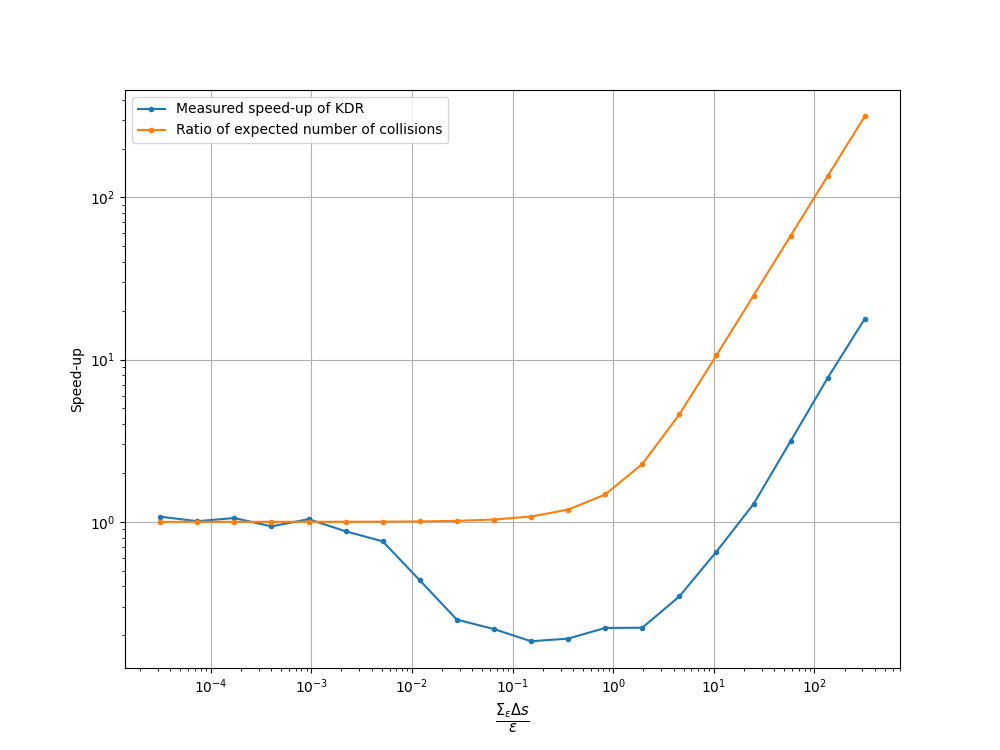

In [7]:
# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7.5))

ax1.loglog(scatteringRateList*dS, avgSpeedUp, '.-', label='Measured speed-up of KDR')
ax1.loglog(scatteringRateList*dS, theoreticalSpeedUp, '.-', label='Ratio of expected number of collisions')
ax1.set_xlabel('$ \\frac{ \Sigma_{\epsilon} \Delta s}{\epsilon}$')
ax1.xaxis.get_label().set_fontsize(15)
ax1.set_ylabel('Speed-up')
ax1.legend()
ax1.grid()
fig.savefig('figures/speedUp.pdf', format='pdf')

In [5]:
# Simulation with eSource = 5. For low scattering rates, no collisions, therefore no KDR step, therefore no performance loss. 

# When collisions start occuring, one kinetic step that traverses \Delta s through the domain, is much cheaper than a diffusive step of length \Delta s. 
# The drop in efficiency is due to the implementation. Some Scipy routines that are used (RegularGridInterpolator) are very slow!

# The algorithmic speed-up in the high collisional regime is clearly once again. 